In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance
from joblib import dump, load

In [2]:
# Import our input dataset
df = pd.read_csv('Data/ML_ready_data.csv')
df.head()

,id,season,week,neutral_site,home_team_x,home_conference,home_points,home_pregame_elo,away_team_x,away_conference,away_points,away_pregame_elo,spread,margin
0,400763593.0,2015.0,1.0,False,UCF,American Athletic,14.0,1626.0,Florida International,Conference USA,15.0,1321.0,-17.0,1.0
1,400603840.0,2015.0,1.0,True,South Carolina,SEC,17.0,1646.0,North Carolina,ACC,13.0,1477.0,-3.5,-4.0
2,400763399.0,2015.0,1.0,False,Central Michigan,Mid-American,13.0,1417.0,Oklahoma State,Big 12,24.0,1567.0,20.5,11.0
3,400603839.0,2015.0,1.0,False,Vanderbilt,SEC,12.0,1365.0,Western Kentucky,Conference USA,14.0,1521.0,-17.5,2.0
4,400756883.0,2015.0,1.0,False,Utah,Pac-12,24.0,1603.0,Michigan,Big Ten,17.0,1553.0,-3.0,-7.0


In [3]:
df['week']=df['week'].astype('int64')
df['id']=df['id'].astype('int64')
df['season']=df['season'].astype('int64')

df.head()

,id,season,week,neutral_site,home_team_x,home_conference,home_points,home_pregame_elo,away_team_x,away_conference,away_points,away_pregame_elo,spread,margin
0,400763593,2015,1,False,UCF,American Athletic,14.0,1626.0,Florida International,Conference USA,15.0,1321.0,-17.0,1.0
1,400603840,2015,1,True,South Carolina,SEC,17.0,1646.0,North Carolina,ACC,13.0,1477.0,-3.5,-4.0
2,400763399,2015,1,False,Central Michigan,Mid-American,13.0,1417.0,Oklahoma State,Big 12,24.0,1567.0,20.5,11.0
3,400603839,2015,1,False,Vanderbilt,SEC,12.0,1365.0,Western Kentucky,Conference USA,14.0,1521.0,-17.5,2.0
4,400756883,2015,1,False,Utah,Pac-12,24.0,1603.0,Michigan,Big Ten,17.0,1553.0,-3.0,-7.0


In [4]:
train_df = df.query("season != 2022")
test_df = df.query("season == 2022")

In [5]:
football_df = train_df.drop(["id","season","week","home_team_x","away_team_x","home_points","away_points"],axis=1).dropna()

football_df.head()

,neutral_site,home_conference,home_pregame_elo,away_conference,away_pregame_elo,spread,margin
0,False,American Athletic,1626.0,Conference USA,1321.0,-17.0,1.0
1,True,SEC,1646.0,ACC,1477.0,-3.5,-4.0
2,False,Mid-American,1417.0,Big 12,1567.0,20.5,11.0
3,False,SEC,1365.0,Conference USA,1521.0,-17.5,2.0
4,False,Pac-12,1603.0,Big Ten,1553.0,-3.0,-7.0


In [6]:
football_df.home_conference.value_counts()

SEC                  597
Big Ten              595
ACC                  546
Conference USA       463
Pac-12               446
American Athletic    416
Mountain West        400
Big 12               395
Mid-American         379
Sun Belt             353
FBS Independents     167
Name: home_conference, dtype: int64

In [7]:
# Generate our categorical variable lists
football_cat = football_df.dtypes[football_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(football_df[football_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(football_cat)
encode_df.head()

,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,home_conference_FBS Independents,home_conference_Mid-American,home_conference_Mountain West,home_conference_Pac-12,home_conference_SEC,...,away_conference_American Athletic,away_conference_Big 12,away_conference_Big Ten,away_conference_Conference USA,away_conference_FBS Independents,away_conference_Mid-American,away_conference_Mountain West,away_conference_Pac-12,away_conference_SEC,away_conference_Sun Belt
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Merge one-hot encoded features and drop the originals
merged_df = football_df.merge(encode_df,left_index=True, right_index=True)
merged_df = merged_df.drop(football_cat,axis=1)
merged_df.head()

,neutral_site,home_pregame_elo,away_pregame_elo,spread,margin,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,...,away_conference_American Athletic,away_conference_Big 12,away_conference_Big Ten,away_conference_Conference USA,away_conference_FBS Independents,away_conference_Mid-American,away_conference_Mountain West,away_conference_Pac-12,away_conference_SEC,away_conference_Sun Belt
0,False,1626.0,1321.0,-17.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,True,1646.0,1477.0,-3.5,-4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,1417.0,1567.0,20.5,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,1365.0,1521.0,-17.5,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,1603.0,1553.0,-3.0,-7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Convert boolean values to int
merged_df["neutral_site"]=merged_df["neutral_site"].astype(int)
merged_df.head()

,neutral_site,home_pregame_elo,away_pregame_elo,spread,margin,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,...,away_conference_American Athletic,away_conference_Big 12,away_conference_Big Ten,away_conference_Conference USA,away_conference_FBS Independents,away_conference_Mid-American,away_conference_Mountain West,away_conference_Pac-12,away_conference_SEC,away_conference_Sun Belt
0,0,1626.0,1321.0,-17.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1646.0,1477.0,-3.5,-4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1417.0,1567.0,20.5,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1365.0,1521.0,-17.5,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1603.0,1553.0,-3.0,-7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Investigating Outlier scores 
merged_df.margin.value_counts()

-3.0     239
-7.0     216
 3.0     205
 7.0     188
-14.0    141
        ... 
-74.0      1
 61.0      1
-67.0      1
 58.0      1
 62.0      1
Name: margin, Length: 129, dtype: int64

In [11]:
merged_df.margin.describe()

count    4757.000000
mean       -3.911709
std        21.491274
min       -74.000000
25%       -18.000000
50%        -3.000000
75%         9.000000
max        78.000000
Name: margin, dtype: float64

(array([  15.,  143.,  435.,  959., 1293., 1154.,  528.,  185.,   40.,
           5.]),
 array([-74. , -58.8, -43.6, -28.4, -13.2,   2. ,  17.2,  32.4,  47.6,
         62.8,  78. ]),
 <BarContainer object of 10 artists>)

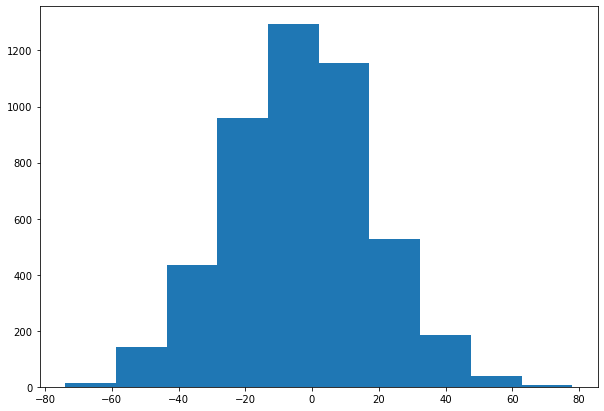

In [12]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(merged_df.margin)

In [13]:
#Retrieve stats for equations of limits
mu = np.average(merged_df.margin)
sigma = np.std(merged_df.margin)
    
#Set boundaries
lowerb = mu - 2*sigma # Lower limit 
upperb = mu + 2*sigma # Upper limit
    
#update outliers to boundary limits
merged_df['margin']= merged_df['margin'].clip(lowerb, upperb)

(array([261., 304., 393., 641., 769., 810., 610., 392., 288., 289.]),
 array([-46.88973991, -38.29413374, -29.69852757, -21.1029214 ,
        -12.50731523,  -3.91170906,   4.68389711,  13.27950328,
         21.87510945,  30.47071562,  39.06632179]),
 <BarContainer object of 10 artists>)

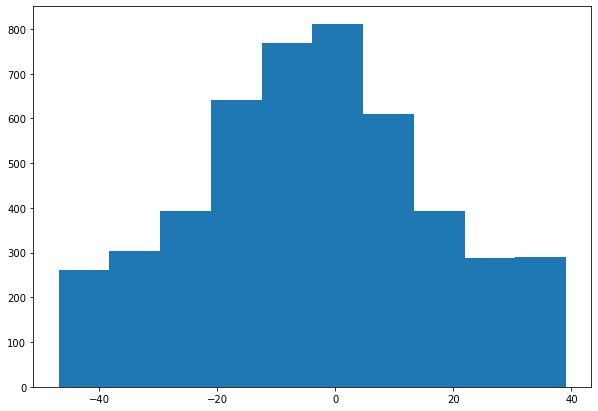

In [14]:
# Updated histogram with the boundaries established to allow stratification
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(merged_df.margin)

In [15]:
# Split our preprocessed data into our features and target arrays
y = merged_df.margin
X = merged_df.drop(columns=["margin"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(y.shape, X.shape)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

(4757,) (4757, 26)


In [16]:
# Saving feature names for later use
feature_list = list(merged_df.columns)

# The baseline predictions are the historical averages
baseline_preds = X_test_scaled[:, feature_list.index('margin')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  16.87


In [17]:
# Create a random forest model
rf_model = RandomForestRegressor(n_estimators=512, random_state=1, verbose=2)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)

# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 512
building tree 2 of 512
building tree 3 of 512
building tree 4 of 512
building tree 5 of 512
building tree 6 of 512
building tree 7 of 512
building tree 8 of 512
building tree 9 of 512
building tree 10 of 512
building tree 11 of 512
building tree 12 of 512
building tree 13 of 512
building tree 14 of 512
building tree 15 of 512
building tree 16 of 512
building tree 17 of 512
building tree 18 of 512
building tree 19 of 512
building tree 20 of 512
building tree 21 of 512
building tree 22 of 512
building tree 23 of 512
building tree 24 of 512
building tree 25 of 512
building tree 26 of 512
building tree 27 of 512
building tree 28 of 512
building tree 29 of 512
building tree 30 of 512
building tree 31 of 512
building tree 32 of 512
building tree 33 of 512
building tree 34 of 512
building tree 35 of 512
building tree 36 of 512
building tree 37 of 512
building tree 38 of 512
building tree 39 of 512
building tree 40 of 512
building tree 41 of 512
building tree 42 of 512
b

building tree 339 of 512
building tree 340 of 512
building tree 341 of 512
building tree 342 of 512
building tree 343 of 512
building tree 344 of 512
building tree 345 of 512
building tree 346 of 512
building tree 347 of 512
building tree 348 of 512
building tree 349 of 512
building tree 350 of 512
building tree 351 of 512
building tree 352 of 512
building tree 353 of 512
building tree 354 of 512
building tree 355 of 512
building tree 356 of 512
building tree 357 of 512
building tree 358 of 512
building tree 359 of 512
building tree 360 of 512
building tree 361 of 512
building tree 362 of 512
building tree 363 of 512
building tree 364 of 512
building tree 365 of 512
building tree 366 of 512
building tree 367 of 512
building tree 368 of 512
building tree 369 of 512
building tree 370 of 512
building tree 371 of 512
building tree 372 of 512
building tree 373 of 512
building tree 374 of 512
building tree 375 of 512
building tree 376 of 512
building tree 377 of 512
building tree 378 of 512


[Parallel(n_jobs=1)]: Done 512 out of 512 | elapsed:   14.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Mean Absolute Error: 12.65


[Parallel(n_jobs=1)]: Done 512 out of 512 | elapsed:    0.3s finished


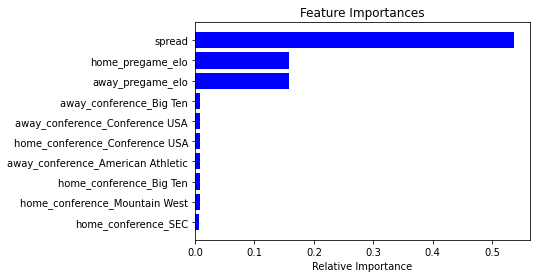

In [18]:
plt.title('Feature Importances')

top_features = 10
features = X.columns
importances = rf_model.feature_importances_
index = np.argsort(importances)

plt.barh(range(top_features), importances[index[-top_features:]], color='b', align='center')
plt.yticks(range(top_features), [features[i] for i in index[-top_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [19]:
X_predict = scaler.fit(X)
X_predict_scaled = X_predict.transform(X)
prediction = rf_model.predict(X_predict_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 512 out of 512 | elapsed:    0.9s finished


In [20]:
predict_df = pd.DataFrame([train_df.season,
                           train_df.week,
                           train_df.home_team_x,
                           train_df.home_points,
                           train_df.away_team_x,
                           train_df.away_points,
                           train_df.spread,
                           train_df.margin,
                           prediction]).transpose()
predict_df.rename(columns = {"Unnamed 0":"Prediction"}, inplace = True)
predict_df

,season,week,home_team_x,home_points,away_team_x,away_points,spread,margin,Prediction
0,2015,1,UCF,14.0,Florida International,15.0,-17.0,1.0,-7.999139
1,2015,1,South Carolina,17.0,North Carolina,13.0,-3.5,-4.0,-9.335938
2,2015,1,Central Michigan,13.0,Oklahoma State,24.0,20.5,11.0,10.853117
3,2015,1,Vanderbilt,12.0,Western Kentucky,14.0,-17.5,2.0,-19.134149
4,2015,1,Utah,24.0,Michigan,17.0,-3.0,-7.0,-2.960938
...,...,...,...,...,...,...,...,...,...
4752,2021,14,Cincinnati,35.0,Houston,20.0,-10.5,-15.0,-17.677475
4753,2021,14,Wake Forest,21.0,Pittsburgh,45.0,3.5,24.0,18.18734
4754,2021,14,Iowa,3.0,Michigan,42.0,12.0,39.0,7.15638
4755,2021,14,California,24.0,USC,14.0,-4.5,-10.0,-6.445312


In [21]:
r2_score(y,prediction)

0.726049571976225

In [22]:
# # Save Model
# dump(rf_model, 'RandomForestRegression_NCAAF.joblib', compress=5) 


## 2022 Season Weeks 1-10 predictions

In [23]:
test_df.head()

,id,season,week,neutral_site,home_team_x,home_conference,home_points,home_pregame_elo,away_team_x,away_conference,away_points,away_pregame_elo,spread,margin
4757,401405059,2022,1,True,Northwestern,Big Ten,31.0,1361.0,Nebraska,Big Ten,28.0,1636.0,12.5,-3.0
4758,401405058,2022,1,False,Illinois,Big Ten,38.0,1496.0,Wyoming,Mountain West,6.0,1497.0,-14.0,-32.0
4759,401404146,2022,1,False,Utah State,Mountain West,31.0,1566.0,Connecticut,FBS Independents,20.0,1117.0,-24.0,-11.0
4760,401426531,2022,1,False,UTEP,Conference USA,13.0,1360.0,North Texas,Conference USA,31.0,1426.0,1.5,18.0
4761,401409235,2022,1,False,New Mexico State,FBS Independents,12.0,1184.0,Nevada,Mountain West,23.0,1564.0,7.0,11.0


In [24]:
test_df.week.value_counts()

11    70
4     60
10    60
6     57
5     56
1     50
3     50
7     50
8     48
2     47
9     47
Name: week, dtype: int64

In [25]:
# Games played prior to week 11
played_df = test_df[test_df['week']<11]
future_df = test_df[test_df['week'] == 11]

In [56]:
# Import our input dataset
W11Lines_df = pd.read_csv('Data/Week11Lines.csv')
W11Lines_df = future_df[future_df.lineProvider == 'Bovada']
# # future_df = future_df.drop(['spread'],axis=1)
# future_df = future_df.merge(W11Lines_df[['id','spread']],on='id', how='left')
# future_df.head()

KeyError: "['spread'] not in index"

In [26]:
played_df.isna().sum()

id                  0
season              0
week                0
neutral_site        0
home_team_x         0
home_conference     0
home_points         0
home_pregame_elo    0
away_team_x         0
away_conference     0
away_points         0
away_pregame_elo    0
spread              0
margin              0
dtype: int64

In [27]:
played_df.home_conference.value_counts()

Big Ten              66
SEC                  65
ACC                  56
Pac-12               51
Sun Belt             50
American Athletic    45
Mountain West        44
Big 12               43
Conference USA       38
Mid-American         38
FBS Independents     29
Name: home_conference, dtype: int64

In [28]:
season_df = played_df.drop(["id","season","week","home_team_x","away_team_x","home_points","away_points"],axis=1).dropna()

season_df.head()

,neutral_site,home_conference,home_pregame_elo,away_conference,away_pregame_elo,spread,margin
4757,True,Big Ten,1361.0,Big Ten,1636.0,12.5,-3.0
4758,False,Big Ten,1496.0,Mountain West,1497.0,-14.0,-32.0
4759,False,Mountain West,1566.0,FBS Independents,1117.0,-24.0,-11.0
4760,False,Conference USA,1360.0,Conference USA,1426.0,1.5,18.0
4761,False,FBS Independents,1184.0,Mountain West,1564.0,7.0,11.0


In [29]:
season_df = season_df.reset_index()

In [30]:
# Generate our categorical variable lists
season_cat = season_df.dtypes[season_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
encode = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encoding_df = pd.DataFrame(encode.fit_transform(season_df[season_cat]))

# Add the encoded variable names to the dataframe
encoding_df.columns = encode.get_feature_names_out(season_cat)
encoding_df.head()

,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,home_conference_FBS Independents,home_conference_Mid-American,home_conference_Mountain West,home_conference_Pac-12,home_conference_SEC,...,away_conference_American Athletic,away_conference_Big 12,away_conference_Big Ten,away_conference_Conference USA,away_conference_FBS Independents,away_conference_Mid-American,away_conference_Mountain West,away_conference_Pac-12,away_conference_SEC,away_conference_Sun Belt
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
# Merge one-hot encoded features and drop the originals
merge_df = season_df.merge(encoding_df,left_index=True, right_index=True)
merge_df = merge_df.drop(season_cat,axis=1)
merge_df = merge_df.drop(['index'],axis=1)
merge_df.head()

,neutral_site,home_pregame_elo,away_pregame_elo,spread,margin,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,...,away_conference_American Athletic,away_conference_Big 12,away_conference_Big Ten,away_conference_Conference USA,away_conference_FBS Independents,away_conference_Mid-American,away_conference_Mountain West,away_conference_Pac-12,away_conference_SEC,away_conference_Sun Belt
0,True,1361.0,1636.0,12.5,-3.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,1496.0,1497.0,-14.0,-32.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,False,1566.0,1117.0,-24.0,-11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,False,1360.0,1426.0,1.5,18.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,1184.0,1564.0,7.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
#Convert boolean values to int
merge_df["neutral_site"]=merge_df["neutral_site"].astype(int)
merge_df.head()

,neutral_site,home_pregame_elo,away_pregame_elo,spread,margin,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,...,away_conference_American Athletic,away_conference_Big 12,away_conference_Big Ten,away_conference_Conference USA,away_conference_FBS Independents,away_conference_Mid-American,away_conference_Mountain West,away_conference_Pac-12,away_conference_SEC,away_conference_Sun Belt
0,1,1361.0,1636.0,12.5,-3.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1496.0,1497.0,-14.0,-32.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,1566.0,1117.0,-24.0,-11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,1360.0,1426.0,1.5,18.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1184.0,1564.0,7.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
merge_df.isna().sum()

neutral_site                         0
home_pregame_elo                     0
away_pregame_elo                     0
spread                               0
margin                               0
home_conference_ACC                  0
home_conference_American Athletic    0
home_conference_Big 12               0
home_conference_Big Ten              0
home_conference_Conference USA       0
home_conference_FBS Independents     0
home_conference_Mid-American         0
home_conference_Mountain West        0
home_conference_Pac-12               0
home_conference_SEC                  0
home_conference_Sun Belt             0
away_conference_ACC                  0
away_conference_American Athletic    0
away_conference_Big 12               0
away_conference_Big Ten              0
away_conference_Conference USA       0
away_conference_FBS Independents     0
away_conference_Mid-American         0
away_conference_Mountain West        0
away_conference_Pac-12               0
away_conference_SEC      

In [34]:
#Investigating Outlier scores 
merge_df.margin.value_counts()

-3.0     34
-7.0     27
 3.0     23
 7.0     18
-10.0    16
         ..
 41.0     1
-29.0     1
 53.0     1
-49.0     1
 39.0     1
Name: margin, Length: 91, dtype: int64

(array([  1.,  13.,  18.,  60.,  89., 153., 111.,  49.,  25.,   6.]),
 array([-73. , -60.4, -47.8, -35.2, -22.6, -10. ,   2.6,  15.2,  27.8,
         40.4,  53. ]),
 <BarContainer object of 10 artists>)

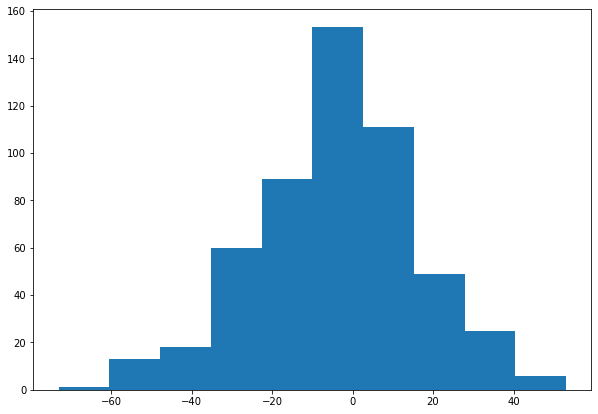

In [35]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(merge_df.margin)

In [36]:
#Retrieve stats for equations of limits
mu_new = np.average(merge_df.margin)
sigma_new = np.std(merge_df.margin)
    
#Set boundaries
lowb = mu_new - 2*sigma_new # Lower limit 
upb = mu_new + 2*sigma_new # Upper limit
    
#update outliers to boundary limits
merge_df['margin']= merge_df['margin'].clip(lowb, upb)

(array([ 30.,  26.,  56.,  54.,  84., 107.,  66.,  45.,  26.,  31.]),
 array([-44.55523972, -36.57219178, -28.58914383, -20.60609589,
        -12.62304794,  -4.64      ,   3.34304794,  11.32609589,
         19.30914383,  27.29219178,  35.27523972]),
 <BarContainer object of 10 artists>)

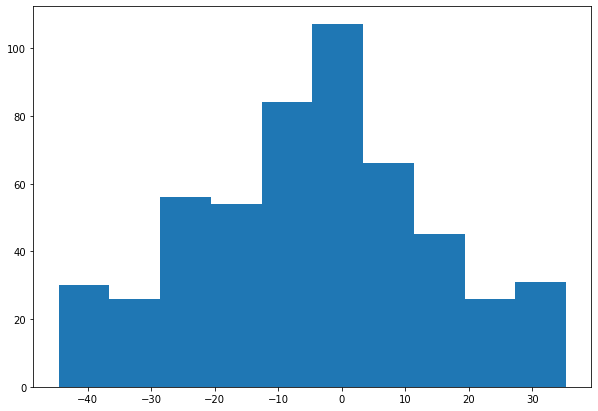

In [37]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(merge_df.margin)

In [58]:
# Split our preprocessed data into our features and target arrays
y_new = merge_df.margin
X_new = merge_df.drop(columns=["margin"])

# Split the preprocessed data into a training and testing dataset
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, random_state=1,stratify=y_new)
print(y_new.shape, X_new.shape)

# Create a StandardScaler instance
scaler_new = StandardScaler()

# Fit the StandardScaler
X_scaler_new = scaler_new.fit(X_train_new)

# Scale the data
X_train_scaled_new = X_scaler_new.transform(X_train_new)
X_test_scaled_new = X_scaler_new.transform(X_test_new)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [44]:
y_new.value_counts()

-3.00000     34
-7.00000     27
 3.00000     23
 7.00000     18
-44.55524    17
             ..
 9.00000      1
-29.00000     1
-37.00000     1
 34.00000     1
 12.00000     1
Name: margin, Length: 76, dtype: int64

In [45]:
# Saving feature names for later use
featured_list = list(merge_df.columns)

# The baseline predictions are the historical averages
base_preds = X_test_scaled_new[:, featured_list.index('margin')]

# Baseline errors, and display average baseline error
base_errors = abs(base_preds - y_test_new)

print('Average baseline error: ', round(np.mean(base_errors), 2))

Average baseline error:  16.07


In [46]:
# rf_model_new = load('RandomForestRegression_NCAAF.joblib') 

In [47]:
# Fitting the model
rf_model_new = rf_model.fit(X_train_scaled_new, y_train_new)

# Evaluate the model
y_pred_new = rf_model_new.predict(X_test_scaled_new)

# Calculate the absolute errors
errors_new = abs(y_pred_new - y_test_new)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_new), 2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 512
building tree 2 of 512
building tree 3 of 512
building tree 4 of 512
building tree 5 of 512
building tree 6 of 512
building tree 7 of 512
building tree 8 of 512
building tree 9 of 512
building tree 10 of 512
building tree 11 of 512
building tree 12 of 512
building tree 13 of 512
building tree 14 of 512
building tree 15 of 512
building tree 16 of 512
building tree 17 of 512
building tree 18 of 512
building tree 19 of 512
building tree 20 of 512
building tree 21 of 512
building tree 22 of 512
building tree 23 of 512
building tree 24 of 512
building tree 25 of 512
building tree 26 of 512
building tree 27 of 512
building tree 28 of 512
building tree 29 of 512
building tree 30 of 512
building tree 31 of 512
building tree 32 of 512
building tree 33 of 512
building tree 34 of 512
building tree 35 of 512
building tree 36 of 512
building tree 37 of 512
building tree 38 of 512
building tree 39 of 512
building tree 40 of 512
building tree 41 of 512
building tree 42 of 512
b

building tree 359 of 512
building tree 360 of 512
building tree 361 of 512
building tree 362 of 512
building tree 363 of 512
building tree 364 of 512
building tree 365 of 512
building tree 366 of 512
building tree 367 of 512
building tree 368 of 512
building tree 369 of 512
building tree 370 of 512
building tree 371 of 512
building tree 372 of 512
building tree 373 of 512
building tree 374 of 512
building tree 375 of 512
building tree 376 of 512
building tree 377 of 512
building tree 378 of 512
building tree 379 of 512
building tree 380 of 512
building tree 381 of 512
building tree 382 of 512
building tree 383 of 512
building tree 384 of 512
building tree 385 of 512
building tree 386 of 512
building tree 387 of 512
building tree 388 of 512
building tree 389 of 512
building tree 390 of 512
building tree 391 of 512
building tree 392 of 512
building tree 393 of 512
building tree 394 of 512
building tree 395 of 512
building tree 396 of 512
building tree 397 of 512
building tree 398 of 512


[Parallel(n_jobs=1)]: Done 512 out of 512 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 512 out of 512 | elapsed:    0.0s finished


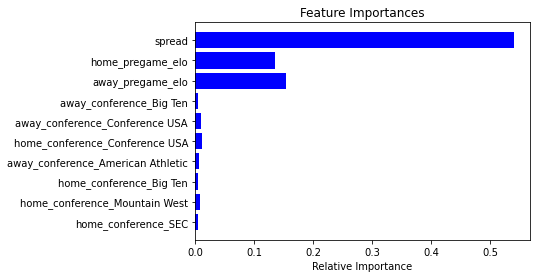

In [48]:
plt.title('Feature Importances')

top_features = 10
features_new = X_new.columns
importances_new = rf_model_new.feature_importances_
index_new = np.argsort(importances_new)

plt.barh(range(top_features), importances_new[index[-top_features:]], color='b', align='center')
plt.yticks(range(top_features), [features_new[i] for i in index[-top_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [49]:
X_predict_new = scaler_new.fit(X_new)
X_predict_scaled_new = X_predict_new.transform(X_new)
prediction_new = rf_model_new.predict(X_predict_scaled_new)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 512 out of 512 | elapsed:    0.0s finished


In [50]:
predict_df_new = pd.DataFrame([played_df.season,
                           played_df.week,
                           played_df.home_team_x,
                           played_df.home_points,
                           played_df.away_team_x,
                           played_df.away_points,
                           played_df.spread,
                           played_df.margin,
                           prediction_new]).transpose()
predict_df_new.rename(columns = {"Unnamed 0":"Prediction"}, inplace = True)
predict_df_new

,season,week,home_team_x,home_points,away_team_x,away_points,spread,margin,Prediction
4757,2022,1,Northwestern,31.0,Nebraska,28.0,12.5,-3.0,NaN
4758,2022,1,Illinois,38.0,Wyoming,6.0,-14.0,-32.0,NaN
4759,2022,1,Utah State,31.0,Connecticut,20.0,-24.0,-11.0,NaN
4760,2022,1,UTEP,13.0,North Texas,31.0,1.5,18.0,NaN
4761,2022,1,New Mexico State,12.0,Nevada,23.0,7.0,11.0,NaN
...,...,...,...,...,...,...,...,...,...
5277,2022,10,NC State,30.0,Wake Forest,21.0,3.0,-9.0,NaN
5278,2022,10,Arizona State,36.0,UCLA,50.0,11.0,14.0,NaN
5279,2022,10,USC,41.0,California,35.0,-21.0,-6.0,NaN
5280,2022,10,San José State,28.0,Colorado State,16.0,-24.0,-12.0,NaN
